# Resource competition: light and Fe in the Southern Ocean

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob

import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import matplotlib.path as mpath
import math

### get pop grid

In [2]:
grid = pop_tools.get_grid('POP_gx1v6')

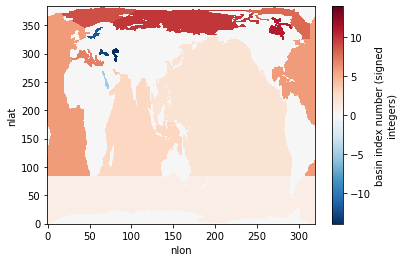

In [3]:
grid.REGION_MASK.plot()

### Get the CESM-LE variables (annual means calculated in cesm-le-annual-means-v2.ipynb)

### DJF

In [4]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['Fe_avg_50m','PAR_avg_50m'] #,'diatC_50m_zint','spC_50m_zint']

ds_list = []
ds_DJF = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}_DJFmean.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds_DJF = xr.merge((ds_DJF, dsv))
    ds_list.append(ds_DJF)
    
#ds_DJF['phytoC_50m_zint'] = ds_DJF.diatC_50m_zint + ds_DJF.spC_50m_zint
ds_DJF = ds_DJF.where(grid.REGION_MASK>0)

Fe_avg_50m
PAR_avg_50m
CPU times: user 90.2 ms, sys: 17 ms, total: 107 ms
Wall time: 220 ms


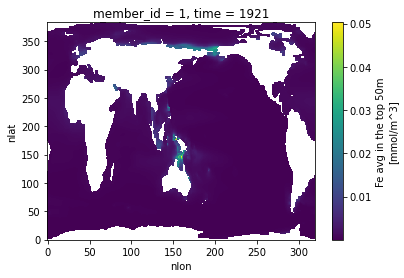

In [20]:
ds_DJF.Fe_avg_50m.sel(time=1921,member_id=1).plot()

In [19]:
ds_DJF

<xarray.Dataset>
Dimensions:      (member_id: 34, nlat: 384, nlon: 320, time: 180, z_t: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * member_id    (member_id) int64 1 2 9 10 11 12 13 ... 35 101 102 103 104 105
  * time         (time) int64 1921 1922 1923 1924 1925 ... 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    KMT          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz           (z_t, nlat, nlon) float32 dask.array<chunksize=(60, 384, 320), meta=np.ndarray>
    Fe_avg_50m   (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 34, 384, 320), meta=np.ndarray>
    PAR_avg_50m  (time, member_id, nlat, nlon) float64 dask.array<chunksize=(180, 34, 384, 320), meta=np.ndarray>

### MAM

In [6]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['Fe_avg_50m','PAR_avg_50m'] #,'diatC_50m_zint','spC_50m_zint']

ds_list = []
ds_MAM = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}_MAMmean.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds_MAM = xr.merge((ds_MAM, dsv))
    ds_list.append(ds_MAM)
    
#ds_MAM['phytoC_50m_zint'] = ds_MAM.diatC_50m_zint + ds_MAM.spC_50m_zint
ds_MAM = ds_MAM.where(grid.REGION_MASK>0)

Fe_avg_50m
PAR_avg_50m
CPU times: user 93.6 ms, sys: 9.6 ms, total: 103 ms
Wall time: 220 ms


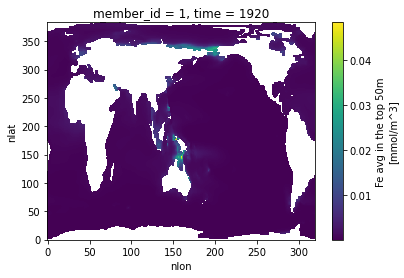

In [7]:
ds_MAM.Fe_avg_50m.isel(time=0,member_id=0).plot()

### JJA

In [8]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['Fe_avg_50m','PAR_avg_50m'] #,'diatC_50m_zint','spC_50m_zint']

ds_list = []
ds_JJA = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}_JJAmean.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds_JJA = xr.merge((ds_JJA, dsv))
    ds_list.append(ds_JJA)
    
#ds_JJA['phytoC_50m_zint'] = ds_JJA.diatC_50m_zint + ds_JJA.spC_50m_zint
ds_JJA = ds_JJA.where(grid.REGION_MASK>0)

Fe_avg_50m
PAR_avg_50m
CPU times: user 90.9 ms, sys: 9.12 ms, total: 100 ms
Wall time: 200 ms


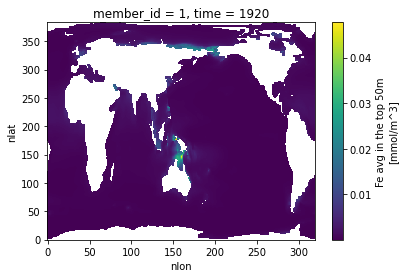

In [9]:
ds_JJA.Fe_avg_50m.isel(time=0,member_id=0).plot()

### SON

In [10]:
%%time
path = '/glade/scratch/kristenk/CESM-LE-output/CESM-LE-'
variables = ['Fe_avg_50m','PAR_avg_50m'] #,'diatC_50m_zint','spC_50m_zint']

ds_list = []
ds_SON = xr.Dataset()

for v in variables:  
    print(v)
    files = sorted(glob(f'{path}{v}_SONmean.nc'))  

    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    ds_SON = xr.merge((ds_SON, dsv))
    ds_list.append(ds_SON)
    
#ds_SON['phytoC_50m_zint'] = ds_SON.diatC_50m_zint + ds_SON.spC_50m_zint
ds_SON = ds_SON.where(grid.REGION_MASK>0)

Fe_avg_50m
PAR_avg_50m
CPU times: user 204 ms, sys: 27.5 ms, total: 232 ms
Wall time: 327 ms


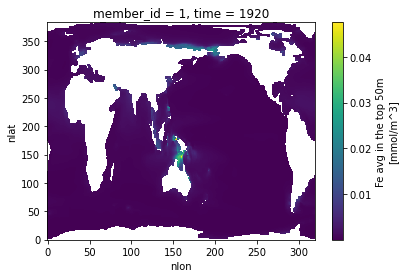

In [11]:
ds_SON.Fe_avg_50m.isel(time=0,member_id=0).plot()

### concat seasonal datasets

In [12]:
ds = xr.concat((ds_DJF, ds_MAM, ds_JJA, ds_SON),'season')

In [114]:
ds.Fe_avg_50m

<xarray.DataArray 'Fe_avg_50m' (season: 4, time: 181, member_id: 34, nlat: 384, nlon: 320)>
dask.array<concatenate, shape=(4, 181, 34, 384, 320), dtype=float64, chunksize=(1, 181, 34, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) int64 1920 1921 1922 1923 1924 ... 2097 2098 2099 2100
    TLAT       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG      (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Fe avg in the top 50m
    units:         mmol/m^3
    grid_loc:      3111
    cell_methods:  time: mean

In [14]:
ds['season'] = ['DJF','MAM','JJA','SON'] 

In [21]:
ds

<xarray.Dataset>
Dimensions:      (member_id: 34, nlat: 384, nlon: 320, season: 4, time: 181, z_t: 60)
Coordinates:
  * time         (time) int64 1920 1921 1922 1923 1924 ... 2097 2098 2099 2100
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
  * member_id    (member_id) int64 1 2 9 10 11 12 13 ... 35 101 102 103 104 105
  * season       (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    KMT          (season, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TAREA        (season, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    dz           (season, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    Fe_avg_50m   (season, time, member_id, nlat, nlon) float64 dask.array<chunksize=(1, 181, 34, 384, 320), meta=np.ndarray>
    PAR_avg_50m  (season, time, member_id, nlat, nlon) float64 dask.array<chunksize=(1, 181, 34, 384, 320), meta=np.ndarray>

### caveat:  no 1920 value for DJF means

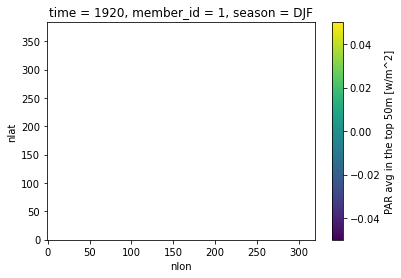

In [17]:
ds.PAR_avg_50m.sel(season='DJF',time=1920,member_id=1).plot()

#### augment list of variables

In [ ]:
#variables = variables + ['phytoC_50m_zint']

### Necessary plotting function

In [22]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8
    
    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [23]:
lons = grid.TLONG
lats = grid.TLAT
area = grid.TAREA
years = ds.time.values
years

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040,
       2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051,
       2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062,
       2063, 2064, 2065, 2066, 2067, 2068, 2069, 20

### extract 1920s

In [24]:
ds.time.isel(time=slice(0,10)).values

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929])

In [25]:
ds_1920s = ds.isel(time=slice(0,10)).mean(dim='time')

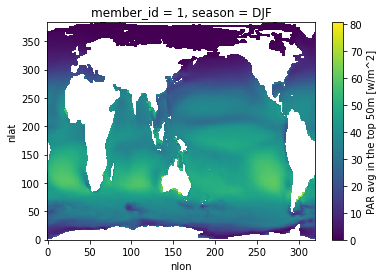

In [26]:
ds_1920s.PAR_avg_50m.isel(member_id=0,season=0).plot()

### extract 1990s

In [27]:
ds.time.isel(time=slice(70,80)).values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [28]:
ds_1990s = ds.isel(time=slice(70,80)).mean(dim='time')

### Extract 2090s

In [29]:
ds.time.isel(time=slice(-11,-1)).values

array([2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099])

In [30]:
ds_2090s = ds.isel(time=slice(-11,-1)).mean(dim='time')

### make ensemble mean

In [31]:
ensemble_mean_1920s = ds_1920s.mean(dim='member_id')
ensemble_mean_1990s = ds_1990s.mean(dim='member_id')
ensemble_mean_2090s = ds_2090s.mean(dim='member_id')

### get masks for making averages

In [32]:
file = '/glade/work/kristenk/TTE_CESM-LE/masks_1990s.nc'
ds_masks = xr.open_dataset(file,decode_times=False)
ds_masks

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320)
Coordinates:
    TLAT      (nlat, nlon) float64 ...
    TLONG     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    ACC_mask  (nlat, nlon) float64 ...
    SIZ_mask  (nlat, nlon) float64 ...

### get the upper 50m average of PAR, Fe, phytoC

#### ACC

In [142]:
ACC_values_ds_1920s = xr.Dataset({v: ensemble_mean_1920s[v] for v in ['season']})
ACC_values_ds_1990s = xr.Dataset({v: ensemble_mean_1990s[v] for v in ['season']})
ACC_values_ds_2090s = xr.Dataset({v: ensemble_mean_2090s[v] for v in ['season']})


for var in variables:
    masked = ensemble_mean_1920s[var].where(ds_masks.ACC_mask==1.)
    ACC_values_ds_1920s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()
    
    masked = ensemble_mean_1990s[var].where(ds_masks.ACC_mask==1.)
    ACC_values_ds_1990s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()
    
    masked = ensemble_mean_2090s[var].where(ds_masks.ACC_mask==1.)
    ACC_values_ds_2090s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()

#### SIZ

In [143]:
SIZ_values_ds_1920s = xr.Dataset({v: ensemble_mean_1920s[v] for v in ['season']})
SIZ_values_ds_1990s = xr.Dataset({v: ensemble_mean_1990s[v] for v in ['season']})
SIZ_values_ds_2090s = xr.Dataset({v: ensemble_mean_2090s[v] for v in ['season']})


for var in variables:
    masked = ensemble_mean_1920s[var].where(ds_masks.SIZ_mask==1.)
    SIZ_values_ds_1920s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()
    
    masked = ensemble_mean_1990s[var].where(ds_masks.SIZ_mask==1.)
    SIZ_values_ds_1990s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()
    
    masked = ensemble_mean_2090s[var].where(ds_masks.SIZ_mask==1.)
    SIZ_values_ds_2090s[var] = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()

### check range of PAR and Fe values to make sure these are included in the resource competition plot

In [144]:
ACC_values_ds_1920s.Fe_avg_50m.values

array([0.00013551, 0.00012043, 0.0001853 , 0.00021425])

In [145]:
ACC_values_ds_2090s.Fe_avg_50m.values

array([0.00014611, 0.00012543, 0.00019649, 0.00022938])

In [146]:
ACC_values_ds_1920s.PAR_avg_50m.values

array([33.37347445, 11.23912023,  4.76550882, 23.97317315])

In [147]:
ACC_values_ds_2090s.PAR_avg_50m.values

array([31.82630188, 10.92722306,  4.47764002, 23.05865388])

In [148]:
SIZ_values_ds_1920s.Fe_avg_50m.values

array([0.00014068, 0.00013751, 0.00023565, 0.00029892])

In [149]:
SIZ_values_ds_2090s.Fe_avg_50m.values

array([0.00011316, 0.00012198, 0.0002165 , 0.00027022])

## start work on resource competition, parameter values are from CESM1

#### define Tfunc -- we'll use a temp of 15°C

In [150]:
### Specify Tfunc
T = 15.
Tref = 30.
q10 = 2.0
Tfunc = q10**((T - Tref) / 10.)

#### assume that Fe is the limiting nutrient (used in both the nutrient lim term and light lim term)

In [151]:
kFe_diat = 8.e-5
kFe_sp = 3.e-5

#### define other parameters

In [152]:
alpha_pi_diat = 0.3
alpha_pi_sp = 0.34

thetaN_max_diat = 4
thetaN_max_sp = 2.5

NtoC = 0.137

thetaC_diat = thetaN_max_diat * NtoC
thetaC_sp = thetaN_max_sp * NtoC

PCref_diat = 4.8
PCref_sp = 4.8

#### create empty matrices and define ranges for [Fe] amd PAR

In [158]:
sp_growthrate = np.full((100,100),np.nan)
diat_growthrate = np.full((100,100),np.nan)

#Fe_vals = np.arange(0.00001,0.0010001,0.00001)
#Fe_vals = np.arange(0.0001,0.00025,0.0000015)
Fe_vals = np.arange(0.000004,0.00040,0.000004)

PAR_vals = np.arange(0,35,0.35)

In [159]:
len(Fe_vals)

100

In [160]:
len(PAR_vals)

100

#### cycle through values and calculate growth rate for sp and diat, taking difference

In [161]:
i=0
j=0

for Fe in Fe_vals: # i loop
    
    for PAR in PAR_vals: # j loop
        
        ##### small phytoplankton
        sp_nut_lim = Fe/(Fe + kFe_sp)
        sp_light_lim = 1 - math.e ** ((-1. * alpha_pi_sp * thetaC_sp * PAR) / (PCref_sp * Tfunc * sp_nut_lim))
        
        sp_growthrate[j,i] = PCref_sp * Tfunc * sp_nut_lim * sp_light_lim
        
        #### diatoms
        diat_nut_lim = Fe/(Fe + kFe_diat)
        diat_light_lim = 1 - math.e ** ((-1. * alpha_pi_diat * thetaC_diat * PAR) / (PCref_diat * Tfunc * diat_nut_lim))
        
        diat_growthrate[j,i] = PCref_diat * Tfunc * diat_nut_lim * diat_light_lim
        
        j = j + 1
        
    i = i + 1
    j = 0

In [162]:
sp_growthrate = xr.DataArray(sp_growthrate,dims=('par_vals','fe_vals'))

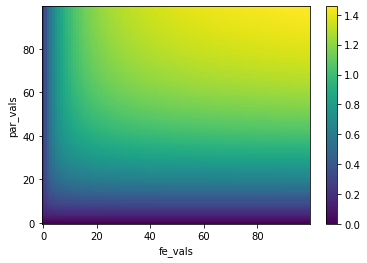

In [163]:
sp_growthrate.plot()

In [164]:
diat_growthrate = xr.DataArray(diat_growthrate,dims=('par_vals','fe_vals'))

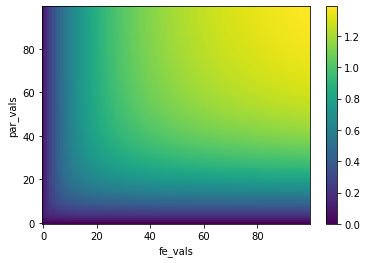

In [165]:
diat_growthrate.plot()

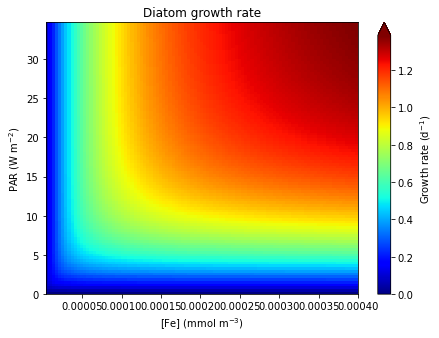

In [166]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)

ax.set_title('Diatom growth rate')
pc=ax.pcolormesh(Fe_vals, PAR_vals, diat_growthrate,cmap='jet')
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (mmol m$^{-3}$)')

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Growth rate (d$^{-1}$)')

fig.savefig('/glade/work/kristenk/figs/diatom_growth_rate.png', bbox_inches='tight', dpi=300, format='png');

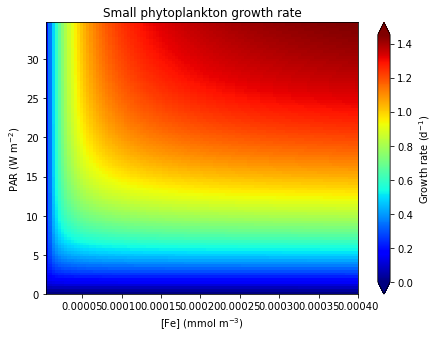

In [167]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)

ax.set_title('Small phytoplankton growth rate')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate,cmap='jet')
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (mmol m$^{-3}$)')

cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)')
fig.savefig('/glade/work/kristenk/figs/sp_growth_rate.png', bbox_inches='tight', dpi=300, format='png');

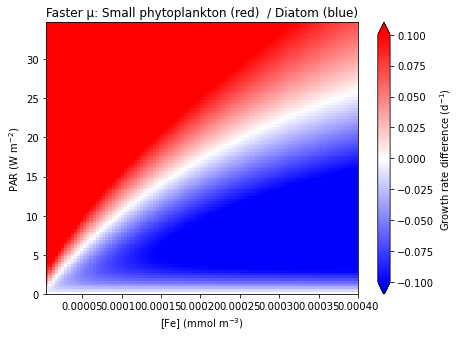

In [168]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)

ax.set_title('Faster µ: Small phytoplankton (red)  / Diatom (blue)')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate-diat_growthrate,cmap='bwr',vmin=-0.1,vmax=0.1)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (mmol m$^{-3}$)')

cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate difference (d$^{-1}$)')

fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

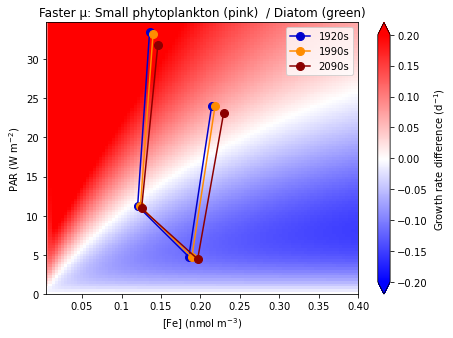

In [185]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)

ax.set_title('Faster µ: Small phytoplankton (pink)  / Diatom (green)')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate-diat_growthrate,cmap='bwr',vmin=-0.2,vmax=0.2)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (nmol m$^{-3}$)')

############## ACC
#1920s
ax.plot(ACC_values_ds_1920s.Fe_avg_50m.values,ACC_values_ds_1920s.PAR_avg_50m.values,
        marker='o',markersize=8,color='mediumblue',label='1920s')
# #1990s
ax.plot(ACC_values_ds_1990s.Fe_avg_50m.values,ACC_values_ds_1990s.PAR_avg_50m.values,
        marker='o',markersize=8,color='darkorange',label='1990s')
# #1990s
ax.plot(ACC_values_ds_2090s.Fe_avg_50m.values,ACC_values_ds_2090s.PAR_avg_50m.values,
        marker='o',markersize=8,color='darkred',label='2090s')

ax.legend()
### add labels in nmol/m3
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate difference (d$^{-1}$)')

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

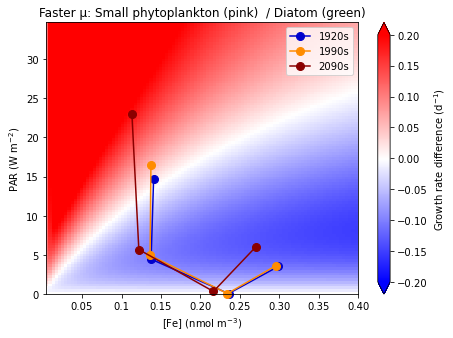

In [186]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)

ax.set_title('Faster µ: Small phytoplankton (pink)  / Diatom (green)')
pc=ax.pcolormesh(Fe_vals, PAR_vals, sp_growthrate-diat_growthrate,cmap='bwr',vmin=-0.2,vmax=0.2)
ax.set_ylabel('PAR (W m$^{-2}$)')
ax.set_xlabel('[Fe] (nmol m$^{-3}$)')

############## ACC
#1920s
ax.plot(SIZ_values_ds_1920s.Fe_avg_50m.values,SIZ_values_ds_1920s.PAR_avg_50m.values,
        marker='o',markersize=8,color='mediumblue',label='1920s',clip_on=False)

# #1990s
ax.plot(SIZ_values_ds_1990s.Fe_avg_50m.values,SIZ_values_ds_1990s.PAR_avg_50m.values,
        marker='o',markersize=8,color='darkorange',label='1990s',clip_on=False)
# #1990s
ax.plot(SIZ_values_ds_2090s.Fe_avg_50m.values,SIZ_values_ds_2090s.PAR_avg_50m.values,
        marker='o',markersize=8,color='darkred',label='2090s',clip_on=False)

ax.legend()
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate difference (d$^{-1}$)')

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');

### fixing xlabels to be in nmol/m3

In [183]:
labels = [item.get_text() for item in ax.get_xticklabels()]
# labels = ['0.10','0.12','0.14','0.16','0.18','0.20','0.22','0.24','0.26']
# ax.set_xticklabels(labels)
labels

['0.00000',
 '0.00005',
 '0.00010',
 '0.00015',
 '0.00020',
 '0.00025',
 '0.00030',
 '0.00035',
 '0.00040']

In [171]:
labels = [item.get_text() for item in ax.get_xticklabels()]

In [65]:
labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']